# Week 12 Final Term Project

## Question / Hypothesis: 

### Are Firearm Sales in Florida Increasing? 

I will be using Exploratory Data Analysis to review the FBIs data set on background checks. Background checks are required for anyone purchasing a firearm from an authorized FFL (Federal Firearm License) seller. An FFL is requried to sell firearms unless privately selling to a single individual. 

In [187]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Downloading required code from author 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py") 
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [188]:
# Importing requried packages and libraries
import numpy as np
import pandas as pd
import statistics

import thinkstats2
import thinkplot
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

First, I will read the .csv file that was downloaded from Kaggle.com and save the data to a variable named "df"

In [189]:
df = pd.read_csv('nics-firearm-background-checks.csv') # reading csv and saving to a variable

Printing the data frame to see the dimensions

In [190]:
df.head() # Using the head() function to view the data frame

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342.0,145.0,15421.0,12848.0,1156.0,1052,0.0,14.0,...,0.0,0.0,0.0,29.0,21.0,14.0,0.0,1.0,0.0,44556
1,2023-09,Alaska,188.0,10.0,2429.0,2543.0,262.0,197,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5922
2,2023-09,Arizona,9113.0,2014.0,14398.0,8239.0,1575.0,931,0.0,14.0,...,0.0,0.0,0.0,6.0,6.0,0.0,1.0,0.0,0.0,38189
3,2023-09,Arkansas,2139.0,181.0,5645.0,6108.0,437.0,466,6.0,8.0,...,0.0,0.0,0.0,6.0,13.0,2.0,0.0,0.0,0.0,17207
4,2023-09,California,28611.0,15559.0,33792.0,20548.0,4295.0,0,0.0,1.0,...,56.0,0.0,0.0,7289.0,3093.0,529.0,26.0,10.0,0.0,118625


In reviewing the data frame, there are a total of 27 variables (columns) and 16445 records (rows). I will select 5 of them to provide a description of them. 

In [191]:
df['month'] = pd.to_datetime(df['month']) # Converts 'month' variable to a datetime for plotting

In [192]:
fl = df[df.state == "Florida"] # Creating a new subset of the date frame that only includes data for Florida
others = df[df.state != "Florida"] # Creating a new subset of the date frame that for all other states

In [193]:
fl.head() # Using the head() function to view the data frame

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
9,2023-09-01,Florida,8399.0,0.0,51223.0,20945.0,4528.0,3085,0.0,6.0,...,2.0,0.0,0.0,259.0,141.0,54.0,47.0,45.0,2.0,95281
64,2023-08-01,Florida,8781.0,0.0,55034.0,19438.0,5008.0,2995,0.0,7.0,...,6.0,0.0,0.0,235.0,140.0,67.0,61.0,31.0,2.0,98132
119,2023-07-01,Florida,8746.0,0.0,59086.0,18577.0,4796.0,3047,0.0,18.0,...,2.0,0.0,0.0,262.0,127.0,63.0,46.0,51.0,0.0,101017
174,2023-06-01,Florida,11470.0,0.0,58766.0,20981.0,4863.0,3213,0.0,6.0,...,3.0,0.0,0.0,246.0,140.0,57.0,63.0,36.0,0.0,106100
229,2023-05-01,Florida,12457.0,0.0,61383.0,21861.0,4709.0,3189,0.0,6.0,...,0.0,0.0,0.0,285.0,158.0,51.0,44.0,36.0,0.0,110038


In [194]:
others.head() # Using the head() function to view the data frame

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09-01,Alabama,10342.0,145.0,15421.0,12848.0,1156.0,1052,0.0,14.0,...,0.0,0.0,0.0,29.0,21.0,14.0,0.0,1.0,0.0,44556
1,2023-09-01,Alaska,188.0,10.0,2429.0,2543.0,262.0,197,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5922
2,2023-09-01,Arizona,9113.0,2014.0,14398.0,8239.0,1575.0,931,0.0,14.0,...,0.0,0.0,0.0,6.0,6.0,0.0,1.0,0.0,0.0,38189
3,2023-09-01,Arkansas,2139.0,181.0,5645.0,6108.0,437.0,466,6.0,8.0,...,0.0,0.0,0.0,6.0,13.0,2.0,0.0,0.0,0.0,17207
4,2023-09-01,California,28611.0,15559.0,33792.0,20548.0,4295.0,0,0.0,1.0,...,56.0,0.0,0.0,7289.0,3093.0,529.0,26.0,10.0,0.0,118625


## A Minimum of 5 Variables in Your Dataset Used During Your Analysis.

The 5 variables selected for analysis are:
- Month
- Handgun
- Long_gun
- multiple
- total

## 5 Variables with Description

1. month
    - The "month" varaible provides date information for the number of background checks.
2. handgun
    - Describes the type of firearm the background check is for. Commonly called a "pistol".
3. long_gun
    - Describes the type of firearm the background check is for. Commonly called a "rifle".
4. multiple
    - This variable decribes a background check when a single individual is purchasing mutliple firearms in one transaction.
5. total
    - This variable describes the total number of background checks for a given state in a given month. 

## Include a Histogram of Each of the 5 Variables

### Month

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

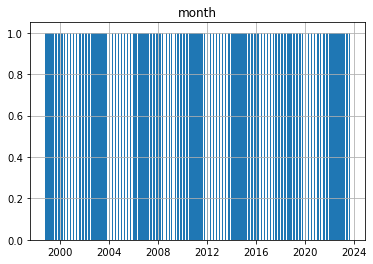

In [195]:
fl.hist('month', bins = 500)

This histogram did not initially make sense to me, but upon further thought it makes sense. There can only be one value of each month in a given year. As an example, there is only one February month per year. 

### Handgun

array([[<AxesSubplot:title={'center':'handgun'}>]], dtype=object)

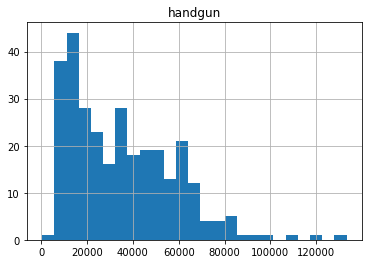

In [196]:
fl.hist('handgun', bins = 25)

Positive skewed distribution

### Long_gun

array([[<AxesSubplot:title={'center':'long_gun'}>]], dtype=object)

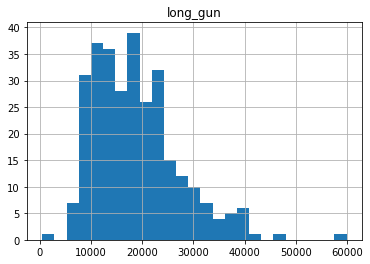

In [197]:
fl.hist('long_gun', bins = 25)

Positive skewed distribution

### Multiple

array([[<AxesSubplot:title={'center':'multiple'}>]], dtype=object)

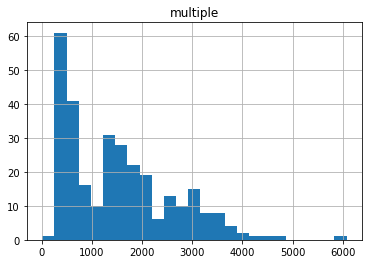

In [198]:
fl.hist('multiple', bins = 25)

Positive skewed distribution

### Totals

array([[<AxesSubplot:title={'center':'totals'}>]], dtype=object)

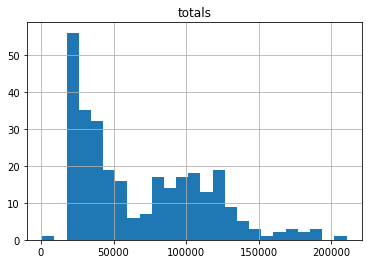

In [199]:
fl.hist("totals", bins = 25)

Appears to be multi-modal distribution

## Include the Other Descriptive Characteristics About the Variables: Mean, Mode, Spread, and Tails

In [200]:
# Calculating the decriptive statistics for the variable "month"
mean = fl.month.mean()
# var = df.month.var()
std = fl.month.std()
mode = statistics.mode(fl.handgun)
print(f"The mean is - {mean}") 
print(f"The varirancethe variance cannot be caclulated using the function var()")
print(f"The standard deviation is - {std}")
print(f"The mode is - {mode}")

The mean is - 2011-04-01 17:29:53.979933184
The varirancethe variance cannot be caclulated using the function var()
The standard deviation is - 2631 days 13:20:36.233858400
The mode is - 11108.0


In [201]:
# Calculating the decriptive statistics for the variable "handgun"
mean = fl.handgun.mean()
var = fl.handgun.var()
std = fl.handgun.std()
mode = statistics.mode(fl.handgun)
print(f"The mean is - {mean:.2f}") 
print(f"The varirancethe is - {var:.2f}")
print(f"The standard deviation is - {std:.2f}")
print(f"The mode is - {mode:.2f}")

The mean is - 35046.37
The varirancethe is - 513599093.27
The standard deviation is - 22662.72
The mode is - 11108.00


In [202]:
# Calculating the decriptive statistics for the variable "long_gun"
mean = fl.long_gun.mean()
var = fl.long_gun.var()
std = fl.long_gun.std()
mode = statistics.mode(fl.long_gun)
print(f"The mean is - {mean:.2f}") 
print(f"The varirancethe is - {var:.2f}")
print(f"The standard deviation is - {std:.2f}")
print(f"The mode is - {mode:.2f}")

The mean is - 18728.80
The varirancethe is - 70539246.23
The standard deviation is - 8398.76
The mode is - 22852.00


In [203]:
# Calculating the decriptive statistics for the variable "multiple"
mean = fl.multiple.mean()
var = fl.multiple.var()
std = fl.multiple.std()
mode = statistics.mode(fl.multiple)
print(f"The mean is - {mean:.2f}") 
print(f"The varirancethe is - {var:.2f}")
print(f"The standard deviation is - {std:.2f}")
print(f"The mode is - {mode:.2f}")

The mean is - 1533.53
The varirancethe is - 1133495.39
The standard deviation is - 1064.66
The mode is - 2495.00


In [204]:
# Calculating the decriptive statistics for the variable "totasl"
mean = fl.totals.mean()
var = fl.totals.var()
std = fl.totals.std()
mode = statistics.mode(fl.totals)
print(f"The mean is - {mean:.2f}") 
print(f"The varirancethe is - {var:.2f}")
print(f"The standard deviation is - {std:.2f}")
print(f"The mode is - {mode:.2f}")

The mean is - 68743.72
The varirancethe is - 1930902443.18
The standard deviation is - 43942.04
The mode is - 95281.00


## Compare Two Scenarios in Your Data Using a PMF

The section immidtaileyt below this is my attempt to understand why the PMF values were much lower than the examples from the book. My understanding is that the probablites of each value are inherently low. Perhaps this is an indication of many outliers? 

In [205]:
probabilities = fl['handgun'].value_counts(normalize=True)

In [206]:
probabilities # Viewing the values of the variable probabilities

11108.0    0.006689
51223.0    0.003344
19701.0    0.003344
17970.0    0.003344
18006.0    0.003344
             ...   
39592.0    0.003344
42570.0    0.003344
42171.0    0.003344
40647.0    0.003344
319.0      0.003344
Name: handgun, Length: 298, dtype: float64

<AxesSubplot:ylabel='Density'>

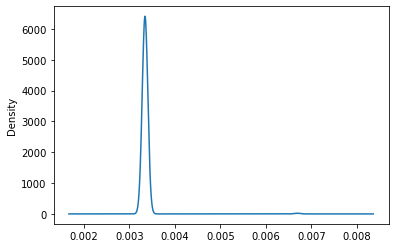

In [207]:
probabilities.plot(kind='density') # Plottiny probability density 

In [208]:
# Using author provided code to calcualte PMFs
fl_pmf = thinkstats2.Pmf(fl.handgun, label = "Florida multiples") 
others_pmf = thinkstats2.Pmf(others.handgun, label = "Others multiple")

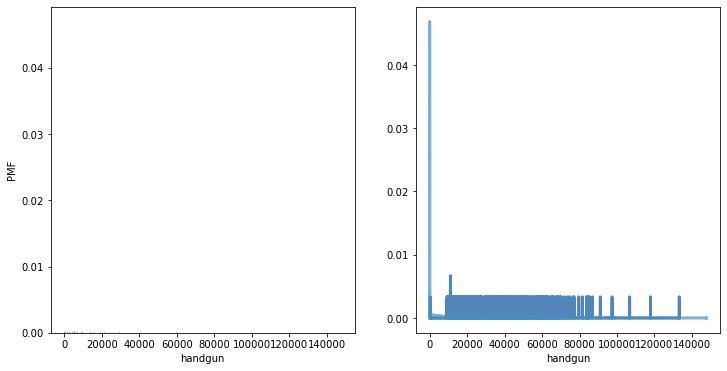

In [209]:
# Using the author code to plot the PMFs

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(fl_pmf, align="right")
thinkplot.Hist(others_pmf, align="left")
thinkplot.Config(xlabel="handgun", ylabel="PMF")

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([fl_pmf, others_pmf])
thinkplot.Config(xlabel="handgun")

I am currently unsure of why the plots are the way they are, it appears the PMF values are low, and when looking to the book for a refrence the values for PMF are much higher (in the book). 

## Create 1 CDF With One of Your Variables

In [210]:
# Using the author provided code to calcualte CDF
cdf = thinkstats2.Cdf(fl.totals, label = "totals")

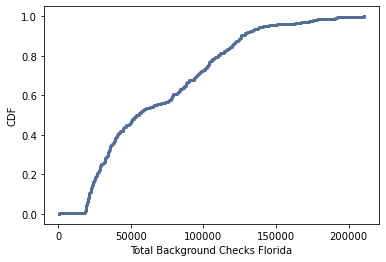

<Figure size 576x432 with 0 Axes>

In [211]:
# Using the author provided code to plot CDF
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = "Total Background Checks Florida", ylabel = "CDF" )

The CDF of the variable "totals" for the Floirda subset "fl" illustrates a few different points. One is that common values are indicated as more vertical section of the CDF plot, another is that we can see that roughly 90% of values fall within 150,000. 

## Plot 1 Analytical Distribution and Provide Your Analysis on How it Applies to the Dataset You Have Chosen

I chose to run a lognormal distribution model on the dataset. 

In [212]:
def MakeNormalModel(x): # Modified the code provided by the author to better represent a different data set.
    """Plots a CDF with a Normal model.

    x: sequence
    """
    cdf = thinkstats2.Cdf(x, label="x")

    mean, var = thinkstats2.TrimmedMeanVar(x)
    std = np.sqrt(var)
    print("n, mean, std", len(x), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

In [213]:
bchecks = fl.handgun # Setting the the data frame column to a new variable

n, mean, std 299 34637.53898305085 21361.940125602738


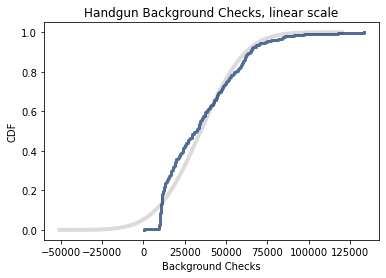

In [214]:
MakeNormalModel(bchecks) # Uses the function MakeNormalModel which takes a single parameter and plots a lognormal distribution
thinkplot.Config(
    title="Handgun Background Checks, linear scale",
    xlabel="Background Checks",
    ylabel="CDF",
    loc="upper right",
)

The distribution appears to start at zero, my assumption for this is that there are not any negative values for background checks. We can see that the distribution confirms a non normal distribution. 

## Create Two Scatter Plots Comparing Two Variables and Provide Your Analysis on Correlation and Causation.

Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis.

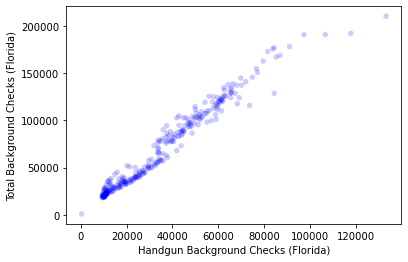

<Figure size 576x432 with 0 Axes>

In [215]:
# Using author provided code to plot two different varaibles
thinkplot.Scatter(fl.handgun, fl.totals)
thinkplot.Show(xlabel = "Handgun Background Checks (Florida)", ylabel = "Total Background Checks (Florida)")

In [216]:
# Using author provided code to calculate covariance 
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [217]:
Cov(fl.handgun, fl.totals)

975251962.7442647

The covariance value indicates a strong relationship between the two variables.

In [218]:
# Using author provided code to calculate correlation
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [219]:
Corr(fl.handgun, fl.totals)

0.9826061252834406

The correlation coefficient is very close to one indicating a strong positive correlation.

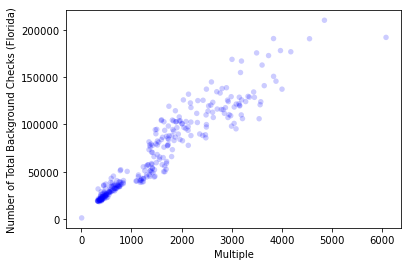

<Figure size 576x432 with 0 Axes>

In [220]:
thinkplot.Scatter(fl.multiple, fl.totals)
thinkplot.Show(xlabel = "Multiple", ylabel = "Number of Total Background Checks (Florida)")

In [221]:
Cov(fl.multiple, fl.totals)

44226207.53130278

The covariance value once again indicates a strong relationship between the two variables.

In [222]:
Corr(fl.multiple, fl.totals)

0.9485158193821798

The correlation coefficient is again close to one, although slightly less than the previous correlation coefficient, indicating a strong positive correlation.

### An Additional Scatterplot for My Own Curiosity 

Additonal Scatterplot below not required, but I wanted to see how the "month" variable interacted with the number of background checks.

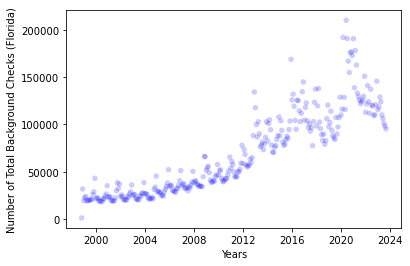

<Figure size 576x432 with 0 Axes>

In [223]:
thinkplot.Scatter(fl.month, fl.totals)
thinkplot.Show(xlabel = "Years", ylabel = "Number of Total Background Checks (Florida)")

There appears to be a clear positive correlation between month and background checks. 

## Conduct a Test on Your Hypothesis

In [224]:
# Using the author provided code to run a Hypothesis Test

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [225]:
data = fl.handgun, fl.totals # Creating a tuple for the hypothesis test

In [226]:
# Using author provided code to calculate the p-value
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value is caclulated to be 0.0 (perhaps not quite zero, the authors code may round). This indicates that the null hypothesis is false. 

## Conduct a Regression Analysis on Either One Dependent and One Xplanatory Variable, or Multiple Explanatory Variables

In [227]:
# Using the authors code to perform a linear regression model using the least squares method

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [228]:
# Setting columns to variables for ease of use
totals = fl.totals 
hg = fl.handgun

In [229]:
# Calculating intercept and slope using the code provided by the author
inter, slope = LeastSquares(hg,totals)
inter, slope

(1972.3159038912854, 1.9052304281014152)

In [230]:
# Using the author provided code to calculate the line of best fit
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [231]:
# Using the FitLine() function to creat a tuple for plotting 
fit_xs, fit_ys = FitLine(hg, inter, slope)

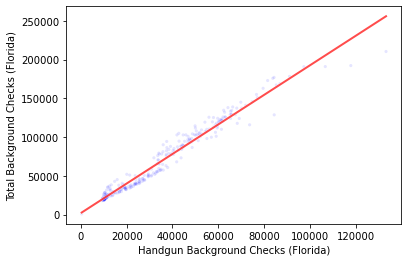

In [232]:
# Plotting the linear regression model with the code provide by the author. 

thinkplot.Scatter(hg, totals, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Handgun Background Checks (Florida)",
                 ylabel='Total Background Checks (Florida)',
                 legend=False)